In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
import time
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('detect_dataset.csv')
print('Sample of the Dataframe')
df.head()

Sample of the Dataframe


,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [3]:
# Listing the properties of each Dataframe column.
print('Listing properties of each Dataframe column')
df.describe()

Listing properties of each Dataframe column


,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
count,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,0.0,0.0
mean,0.457962,6.709369,-26.557793,22.353043,0.010517,-0.015498,0.004980,NaN,NaN
std,0.498250,377.158470,357.458613,302.052809,0.346221,0.357644,0.349272,NaN,NaN
min,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.659921,-0.612709,NaN,NaN
25%,0.000000,-64.348986,-51.421937,-54.562257,-0.237610,-0.313721,-0.278951,NaN,NaN
50%,0.000000,-3.239788,4.711283,-0.399419,0.002465,-0.007192,0.008381,NaN,NaN
75%,1.000000,53.823453,69.637787,45.274542,0.285078,0.248681,0.289681,NaN,NaN
max,1.000000,885.738571,889.868884,901.274261,0.609864,0.627875,0.608243,NaN,NaN


In [4]:
print('Number of rows and columns in the dataset')
df.shape

Number of rows and columns in the dataset


(12001, 9)

In [6]:
# Extracting the count of Output column values from the dataset.
print('Extracting the count of output column values from the dataset.')
output = df['Output (S)'].value_counts()
output

Vaibhav Jain and Simran Ahuja - Extracting the count of output column values from the dataset.


0    6505
1    5496
Name: Output (S), dtype: int64

In [7]:
print('Total values in the Output (S) dataframe')
total = output[0]+output[1]
total

Vaibhav Jain and Simran Ahuja - Total values in the Output (S) dataframe


12001

In [9]:
# Percentage of Percentage of No Fault in the Output Column.
print('Percentage of No Fault in the Output Column.')
zero_per = (output[0]/total*100)
round(zero_per,2)

Vaibhav Jain and Simran Ahuja - Percentage of No Fault in the Output Column.


54.2

In [10]:
# Percentage of Faults in the Output Column.
print('Percentage of Faults in the Output Column.')
one_per = (output[1]/total*100)
round(one_per,2)

Vaibhav Jain and Simran Ahuja - Percentage of Faults in the Output Column.


45.8

## Dataset looks balanced and no form of sampling is required. 

## Dropping Null Columns

In [14]:
df = df.drop(columns=["Unnamed: 7", "Unnamed: 8"])

In [15]:
df

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050
...,...,...,...,...,...,...,...
11996,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
11997,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
11998,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
11999,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


Vaibhav Jain and Simran Ahuja - Visualising the Correlation of all the features with the output classes.


<AxesSubplot:title={'center':'Correlation with Output (S)'}>

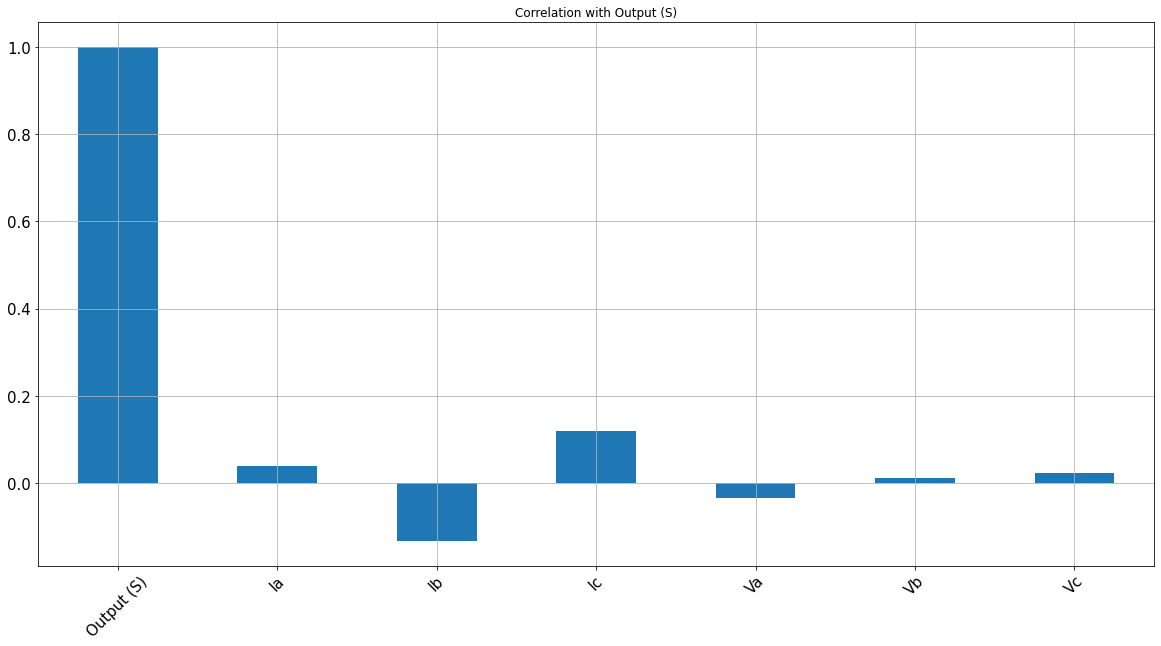

In [16]:
# Visualising the Correlation of all the features with the output classes.
print('Visualising the Correlation of all the features with the output classes.')
df.corrwith(df['Output (S)']).plot.bar(
        figsize = (20, 10), title = "Correlation with Output (S)", fontsize = 15,
        rot = 45, grid = True)

In [17]:
sns.set(style="white")
corr = df.corr()
corr.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
Output (S),1.000000,0.039408,-0.134028,0.120044,-0.035377,0.012206,0.022570
Ia,0.039408,1.000000,-0.375477,-0.275694,0.032598,-0.158207,0.129686
Ib,-0.134028,-0.375477,1.000000,-0.530187,-0.027052,0.032248,-0.006205
Ic,0.120044,-0.275694,-0.530187,1.000000,-0.001813,-0.096194,0.100298
Va,-0.035377,0.032598,-0.027052,-0.001813,1.000000,-0.507928,-0.471163


Vaibhav Jain and Simran Ahuja - The Correlation Heatmap.


<AxesSubplot:>

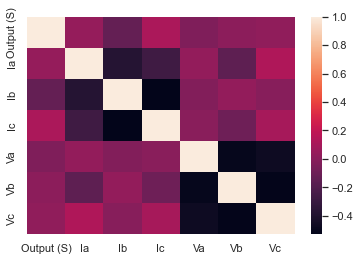

In [18]:
# The Correlation Heatmap.
print('The Correlation Heatmap.')
sns.heatmap(corr)

## Model Building

In [19]:
y = df['Output (S)']
X = df.drop(['Output (S)'], axis = 1)

In [20]:
# Splitting data into train and test dataframes.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [21]:
print('Number of examples in Train and Test Dataset.')
print('Train: ', X_train.shape)
print('Test: ', X_test.shape)

test_data_pred =  X_test.copy()
test_data_pred['Actual Output (S) Label'] = y_test

Vaibhav Jain and Simran Ahuja - Number of examples in Train and Test Dataset.
Train:  (8400, 6)
Test:  (3601, 6)


In [22]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

## Model Training

## Random Forest

In [23]:
# Instantiating a Random Forest Classifier with 100 trees.
rf_model = RandomForestClassifier(n_estimators = 100)

# Fitting the model to the data and recording the training time.
start_rf = time.time()
model_rf = rf_model.fit(X_train, y_train)
stop_rf = time.time()

In [24]:
# Predicting the output class labels for test data.
y_pred_rf = rf_model.predict(X_test)

In [25]:
# Evaluation metrics
print('Evaluation metrics.')
print("Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Precision: ", precision_score(y_test, y_pred_rf))
print("Recall: ", recall_score(y_test, y_pred_rf))
print("F1 Score: ", f1_score(y_test, y_pred_rf))
print(f"Training time: {stop_rf - start_rf}s")

Vaibhav Jain and Simran Ahuja - Evaluation metrics.
Accuracy:  0.9958344904193279
Precision:  0.9981640146878825
Recall:  0.992696287279367
F1 Score:  0.9954226426609704
Training time: 0.5700631141662598s


In [26]:
# Confusion Matrix for the test data
print('Confusion Matrix for the test data.')
print(confusion_matrix( y_test, y_pred_rf))

Vaibhav Jain and Simran Ahuja - Confusion Matrix for the test data.
[[1955    3]
 [  12 1631]]


In [27]:
# Classification Report for Random Forest
print('Classification Report for Random Forest.')
rf_cls_report = classification_report(y_test, y_pred_rf)
print(rf_cls_report)

Vaibhav Jain and Simran Ahuja - Classification Report for Random Forest.
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1958
           1       1.00      0.99      1.00      1643

    accuracy                           1.00      3601
   macro avg       1.00      1.00      1.00      3601
weighted avg       1.00      1.00      1.00      3601



Vaibhav Jain and Simran Ahuja - Feature Importance for Random Forest.


<AxesSubplot:>

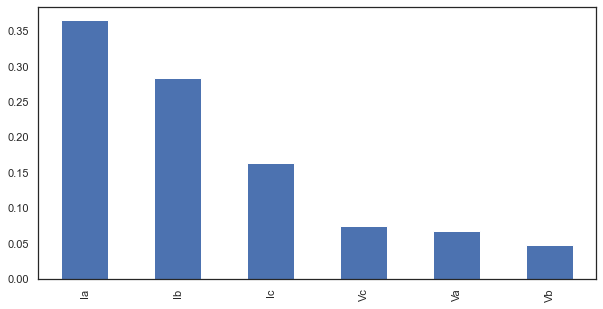

In [28]:
# Feature Importance for Random Forest
print('Feature Importance for Random Forest.')
var_importance = pd.Series(rf_model.feature_importances_)
var_importance.index = X_train.columns
plt.figure( figsize = (10, 5) )
var_importance.sort_values(ascending = False).plot.bar()

Vaibhav Jain and Simran Ahuja - Plot the ROC curve.


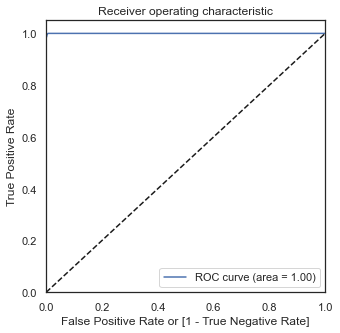

In [29]:
# Predicted probability
y_test_pred_proba = model_rf.predict_proba(X_test)[:,1]

# Plot the ROC curve
print('Plot the ROC curve.')
draw_roc(y_test, y_test_pred_proba)

## KNN

In [30]:
# Instantiating a KNN Classifier with 3 neighbours to be used for query matching.
clf_knn = KNeighborsClassifier(n_neighbors=3)

In [31]:
# Recording the training start time.
start_knn = time.time()

In [32]:
# Fitting the model to the data.
print('Fitting KNN model to the data.')
model_knn = clf_knn.fit(X_train, y_train)

Vaibhav Jain and Simran Ahuja - Fitting KNN model to the data.


In [33]:
# Recording the training end time.
stop_knn = time.time()

In [34]:
# Predicting the output class labels for test data.
y_pred_knn = model_knn.predict(X_test)

In [35]:
# Evaluation metrics
print('Evaluation metrics.')
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("Precision: ", precision_score(y_test, y_pred_knn))
print("Recall: ", recall_score(y_test, y_pred_knn))
print("F1 Score: ", f1_score(y_test, y_pred_knn))
print(f"Training time: {stop_knn - start_knn}s")

Vaibhav Jain and Simran Ahuja - Evaluation metrics.
Accuracy:  0.991113579561233
Precision:  1.0
Recall:  0.9805234327449787
F1 Score:  0.9901659496004916
Training time: 0.5069732666015625s


In [36]:
print(y_test)

4954     1
12000    0
11760    0
7532     1
11967    0
        ..
10983    0
7876     0
4544     1
4000     0
10457    0
Name: Output (S), Length: 3601, dtype: int64


In [37]:
print(y_pred_knn)

[1 0 0 ... 1 0 0]


In [38]:
print('Classification Report.')
knn_cls_report = classification_report(y_test, y_pred_knn)
print(knn_cls_report)

Vaibhav Jain and Simran Ahuja - Classification Report.
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1958
           1       1.00      0.98      0.99      1643

    accuracy                           0.99      3601
   macro avg       0.99      0.99      0.99      3601
weighted avg       0.99      0.99      0.99      3601



In [39]:
print(confusion_matrix( y_test, y_pred_knn))

[[1958    0]
 [  32 1611]]


Vaibhav Jain and Simran Ahuja - Plot the ROC curve.


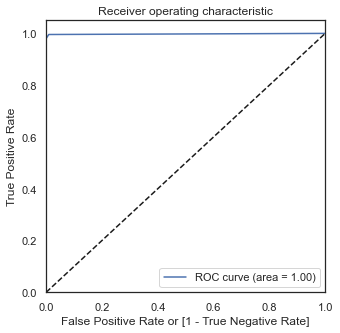

In [40]:
# Predicted probability
y_test_pred_proba = model_knn.predict_proba(X_test)[:,1]

# Plot the ROC curve
print('Plot the ROC curve.')
draw_roc(y_test, y_test_pred_proba)

## SVM

In [41]:
from sklearn.svm import SVC
model_svm = SVC(probability=True)

In [42]:
start_svc = time.time()

In [43]:
model_svc = model_svm.fit(X_train, y_train)

In [44]:
stop_svc = time.time()

In [45]:
y_pred_svc = model_svc.predict(X_test)

In [46]:
print("Accuracy: ", accuracy_score(y_test, y_pred_svc))
print("Precision: ", precision_score(y_test, y_pred_svc))
print("Recall: ", recall_score(y_test, y_pred_svc))
print("F1 Score: ", f1_score(y_test, y_pred_svc))
print(f"Training time: {stop_svc - start_svc}s")

Accuracy:  0.9805609552901972
Precision:  1.0
Recall:  0.9573950091296409
F1 Score:  0.9782338308457711
Training time: 1.0550382137298584s


In [47]:
print('Classification Report.')
svc_cls_report = classification_report(y_test, y_pred_svc)
print(svc_cls_report)

Vaibhav Jain and Simran Ahuja - Classification Report.
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1958
           1       1.00      0.96      0.98      1643

    accuracy                           0.98      3601
   macro avg       0.98      0.98      0.98      3601
weighted avg       0.98      0.98      0.98      3601



In [48]:
print(confusion_matrix( y_test, y_pred_svc))

[[1958    0]
 [  70 1573]]


Vaibhav Jain and Simran Ahuja - Plot the ROC curve.


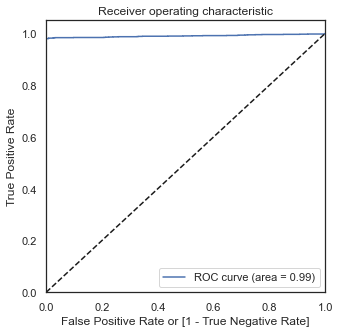

In [49]:
# Predicted probability
y_test_pred_proba = model_svm.predict_proba(X_test)[:,1]

# Plot the ROC curve
print('Plot the ROC curve.')
draw_roc(y_test, y_test_pred_proba)

## Logistic Regression

In [50]:
clf_lr = LogisticRegression(random_state = 0)

In [51]:
start_lr = time.time()

In [52]:
model_lr = clf_lr.fit(X_train,y_train)

In [53]:
stop_lr = time.time()

In [54]:
y_pred_lr = model_lr.predict(X_test)

In [55]:
print('Evaluation metrics.')
print("Accuracy: ", accuracy_score(y_test, y_pred_lr))
print("Precision: ", precision_score(y_test, y_pred_lr))
print("Recall: ", recall_score(y_test, y_pred_lr))
print("F1 Score: ", f1_score(y_test, y_pred_lr))
print(f"Training time: {stop_lr - start_lr}s")

Vaibhav Jain and Simran Ahuja - Evaluation metrics.
Accuracy:  0.731185781727298
Precision:  1.0
Recall:  0.4108338405356056
F1 Score:  0.5823986194995686
Training time: 1.8599812984466553s


In [56]:
print('Classification Report.')
lr_cls_report = classification_report(y_test, y_pred_lr)
print(lr_cls_report)

Vaibhav Jain and Simran Ahuja - Classification Report.
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      1958
           1       1.00      0.41      0.58      1643

    accuracy                           0.73      3601
   macro avg       0.83      0.71      0.69      3601
weighted avg       0.82      0.73      0.70      3601



In [57]:
print(confusion_matrix( y_test, y_pred_lr))

[[1958    0]
 [ 968  675]]


Vaibhav Jain and Simran Ahuja - Plot the ROC curve.


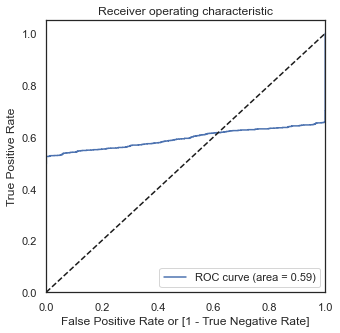

In [58]:
# Predicted probability
y_test_pred_proba = model_lr.predict_proba(X_test)[:,1]

# Plot the ROC curve
print('Plot the ROC curve.')
draw_roc(y_test, y_test_pred_proba)

## Decision Tree

In [59]:
# Instantiating a Decision Tree Classifier with default parameters.
clf_dt = DecisionTreeClassifier()

# Fitting the model to the data and recording the training time.
start_dt = time.time()
model_dt = clf_dt.fit(X_train, y_train)
stop_dt = time.time()

In [60]:
# Predicting the output class labels for test data.
y_pred_dt = model_dt.predict(X_test)

In [61]:
# Evaluation metrics
print('Evaluation metrics.')
print("Accuracy: ", accuracy_score(y_test, y_pred_dt))
print("Precision: ", precision_score(y_test, y_pred_dt))
print("Recall: ", recall_score(y_test, y_pred_dt))
print("F1 Score: ", f1_score(y_test, y_pred_dt))
print(f"Training time: {stop_dt - start_dt}s")

Vaibhav Jain and Simran Ahuja - Evaluation metrics.
Accuracy:  0.9938905859483477
Precision:  0.996934396076027
Recall:  0.9896530736457699
F1 Score:  0.9932803909590715
Training time: 0.029998779296875s


In [62]:
# Classification Report
print('Classification Report.')
dt_cls_report = classification_report(y_test, y_pred_dt)
print(dt_cls_report)

Vaibhav Jain and Simran Ahuja - Classification Report.
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1958
           1       1.00      0.99      0.99      1643

    accuracy                           0.99      3601
   macro avg       0.99      0.99      0.99      3601
weighted avg       0.99      0.99      0.99      3601



Vaibhav Jain and Simran Ahuja - Plot the ROC curve.


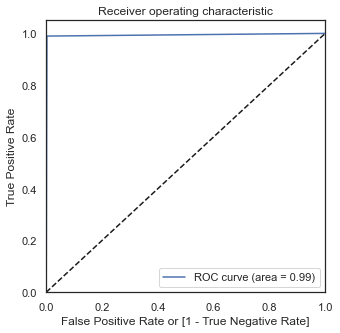

In [63]:
# Predicted probability
y_test_pred_proba = model_dt.predict_proba(X_test)[:,1]

# Plot the ROC curve
print('Plot the ROC curve.')
draw_roc(y_test, y_test_pred_proba)

In [64]:
from sklearn.naive_bayes import GaussianNB

In [65]:
clf_gnb = GaussianNB()

In [66]:
start_gnb = time.time()

In [67]:
model_gnb = clf_gnb.fit(X_train, y_train)

In [68]:
stop_gnb = time.time()

In [69]:
y_pred_gnb = model_gnb.predict(X_test)

In [70]:
print('Evaluation metrics.')
print("Accuracy: ", accuracy_score(y_test, y_pred_gnb))
print("Precision: ", precision_score(y_test, y_pred_gnb))
print("Recall: ", recall_score(y_test, y_pred_gnb))
print("F1 Score: ", f1_score(y_test, y_pred_gnb))
print(f"Training time: {stop_gnb - start_gnb}s")

Vaibhav Jain and Simran Ahuja - Evaluation metrics.
Accuracy:  0.9783393501805054
Precision:  1.0
Recall:  0.9525258673158856
F1 Score:  0.9756857855361596
Training time: 0.6158461570739746s


In [71]:
# Classification Report
print('Classification Report.')
gnb_cls_report = classification_report(y_test, y_pred_gnb)
print(gnb_cls_report)

Vaibhav Jain and Simran Ahuja - Classification Report.
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1958
           1       1.00      0.95      0.98      1643

    accuracy                           0.98      3601
   macro avg       0.98      0.98      0.98      3601
weighted avg       0.98      0.98      0.98      3601



Vaibhav Jain and Simran Ahuja - Plot the ROC curve.


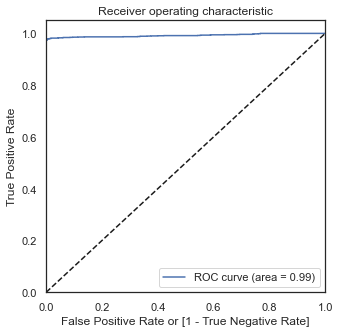

In [72]:
# Predicted probability
y_test_pred_proba = model_gnb.predict_proba(X_test)[:,1]

# Plot the ROC curve
print('Plot the ROC curve.')
draw_roc(y_test, y_test_pred_proba)

## K-Fold Crossvalidation

In [73]:
from sklearn.model_selection import cross_val_score

# K-FOLD using Random Forest

In [74]:
f1scores_rf = cross_val_score(model_rf, X_train, y_train, scoring ='f1', cv=10)

In [76]:
f1scores_rf

array([0.99741602, 0.99870298, 0.99740933, 0.99869961, 0.9974026 ,
       0.99610895, 0.99220779, 0.99739583, 0.99222798, 0.98963731])

In [77]:
avg_rf = np.mean(f1scores_rf)
avg_rf

0.9957208397452609

# K-FOLD using KNN

In [78]:
f1scores_knn = cross_val_score(model_knn, X_train, y_train, scoring ='f1', cv=10)

In [79]:
f1scores_knn

array([0.99220779, 0.9921671 , 0.9921875 , 0.99479167, 0.99346405,
       0.98955614, 0.98829649, 0.98950131, 0.98694517, 0.98697917])

In [81]:
avg_knn = np.mean(f1scores_knn)
avg_knn

0.9906096386422053

# K-FOLD using SVC

In [82]:
f1scores_svc = cross_val_score(model_svc, X_train, y_train, scoring ='f1', cv=10)

In [83]:
f1scores_svc

array([0.97748344, 0.97748344, 0.98018494, 0.99082569, 0.97606383,
       0.96921017, 0.98013245, 0.98013245, 0.97877984, 0.97203728])

In [84]:
avg_knn = np.mean(f1scores_svc)
avg_knn

0.9782333544995016

# K-FOLD using Logistic Regression

In [85]:
f1scores_lr = cross_val_score(model_lr, X_train, y_train, scoring ='f1', cv=10)

In [86]:
f1scores_lr

array([0.58088235, 0.54339623, 0.54064272, 0.61510791, 0.56074766,
       0.53333333, 0.60254083, 0.55263158, 0.58195212, 0.56610801])

In [87]:
avg_lr = np.mean(f1scores_lr)
avg_lr

0.5677342751132887

# K-FOLD using Decision Tree

In [88]:
f1scores_dt = cross_val_score(model_dt, X_train, y_train, scoring ='f1', cv=10)

In [89]:
f1scores_dt

array([0.99224806, 0.99870298, 0.99740933, 0.99739583, 0.99479167,
       0.99092088, 0.98963731, 0.99477807, 0.98961039, 0.99222798])

In [90]:
avg_dt = np.mean(f1scores_dt)
avg_dt

0.9937722496020222

# K-FOLD using Gaussian naive bayes

In [95]:
f1scores_gnb = cross_val_score(model_gnb, X_train, y_train, scoring ='f1', cv=10)

In [96]:
f1scores_gnb

array([0.97612732, 0.97612732, 0.97612732, 0.98950131, 0.9747004 ,
       0.97058824, 0.97742364, 0.97742364, 0.9747004 , 0.97203728])

In [97]:
avg_gnb = np.mean(f1scores_gnb)

In [98]:
avg_gnb

0.9764756870607829

### Results Comparison

|Classifier| |F1 Score| 
|-----| |-----|
|Random Forest| |0.995|
|KNN|  |0.990|
|SVC| |0.978|
|Logistic Regression| |0.582|
|Decision Tree| |0.993|
|Gaussian naive bayes| |0.975|


### Results Comparison after K-Fold

|Classifier| |F1 Score| 
|-----| |-----|
|Random Forest| |0.995|
|KNN|  |0.990|
|SVC| |0.978|
|Logistic Regression| |0.567|
|Decision Tree| |0.993|
|Gaussian naive bayes| |0.976|